In [1]:
import pandas as pd
import pylab as pl
import numpy as np
import scipy.optimize as opt
import statsmodels.api as sm
from sklearn import preprocessing
'exec(% matplotlib inline)'
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sn

In [2]:
disease_df = pd.read_csv("/Users/agoni/framingham.csv")
disease_df.drop(['education'], inplace = True, axis = 1)
disease_df.rename(columns ={'male':'Sex_male'}, inplace = True)

In [3]:
disease_df.dropna(axis = 0, inplace = True)
print(disease_df.head(), disease_df.shape)
print(disease_df.TenYearCHD.value_counts())

   Sex_male  age  currentSmoker  cigsPerDay  BPMeds  prevalentStroke  \
0         1   39              0         0.0     0.0                0   
1         0   46              0         0.0     0.0                0   
2         1   48              1        20.0     0.0                0   
3         0   61              1        30.0     0.0                0   
4         0   46              1        23.0     0.0                0   

   prevalentHyp  diabetes  totChol  sysBP  diaBP    BMI  heartRate  glucose  \
0             0         0    195.0  106.0   70.0  26.97       80.0     77.0   
1             0         0    250.0  121.0   81.0  28.73       95.0     76.0   
2             0         0    245.0  127.5   80.0  25.34       75.0     70.0   
3             1         0    225.0  150.0   95.0  28.58       65.0    103.0   
4             0         0    285.0  130.0   84.0  23.10       85.0     85.0   

   TenYearCHD  
0           0  
1           0  
2           0  
3           1  
4           

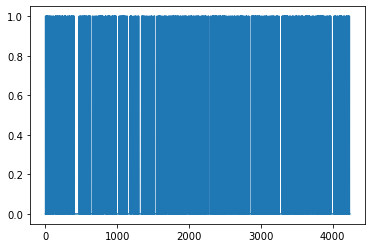

In [4]:
laste = disease_df['TenYearCHD'].plot()
plt.show(laste)

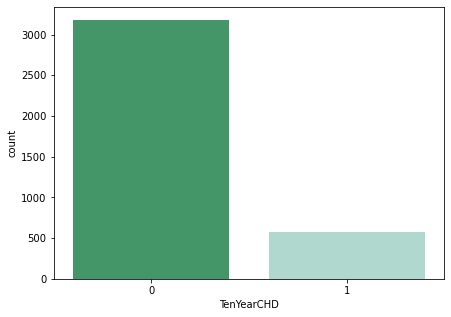

In [5]:
plt.figure(figsize = (7, 5))
sn.countplot(x ='TenYearCHD', data = disease_df,
palette ="BuGn_r" )
plt.show()

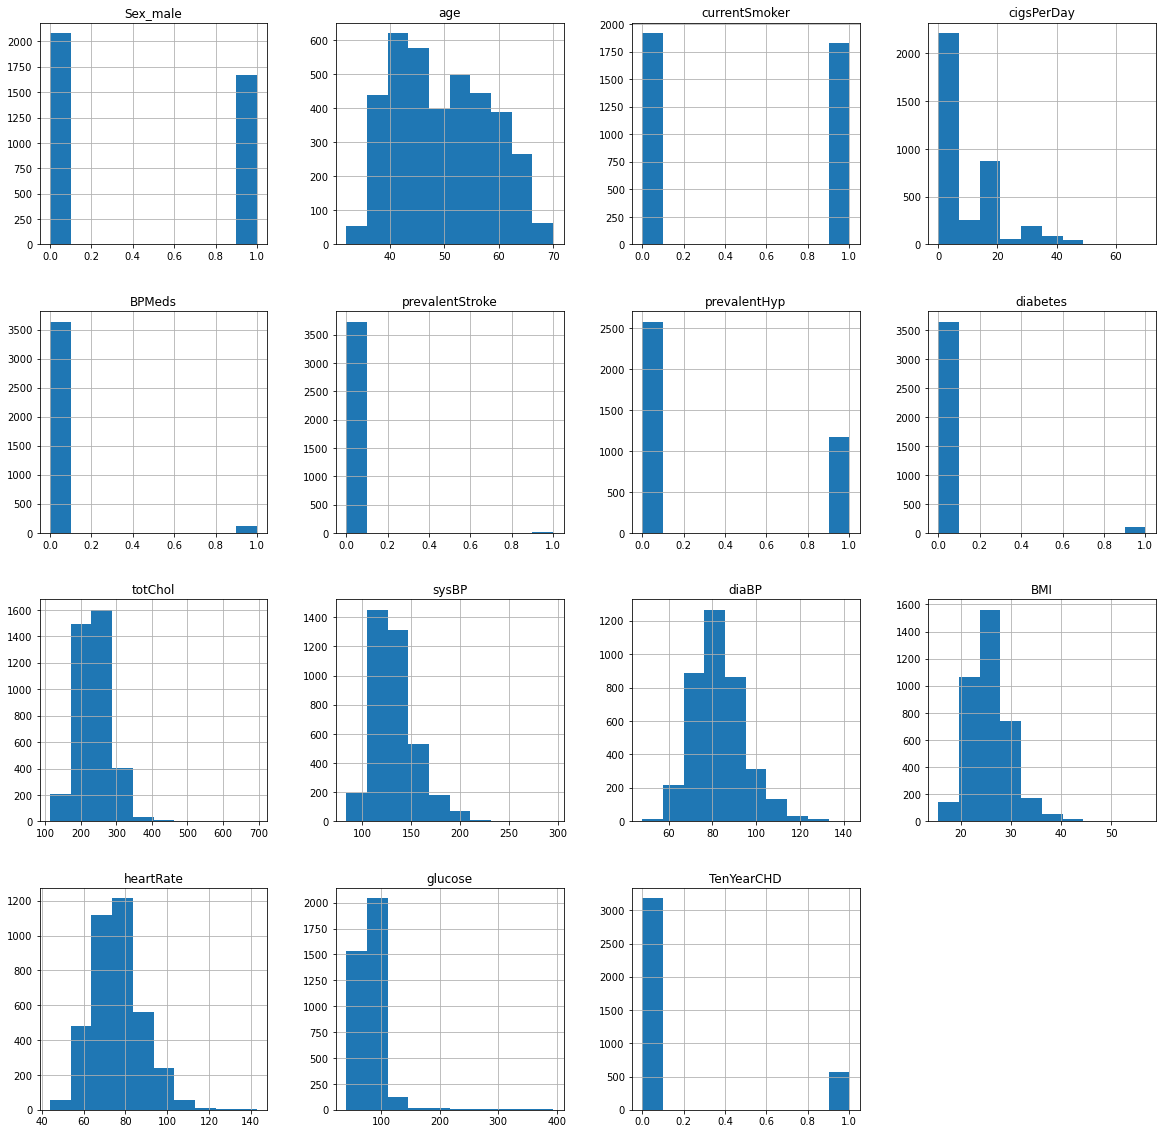

In [6]:
import matplotlib.pyplot as pyplot

disease_df.hist(figsize = (20, 20))
pyplot.show()

In [7]:
features = ['Sex_male', 'age', 'currentSmoker', 'cigsPerDay', 'BPMeds', 'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP', 'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD']

In [8]:
from sklearn.model_selection import train_test_split
X = disease_df[features]
Y = disease_df['TenYearCHD']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.01, random_state = 100)

In [9]:
X_train

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1186,1,49,0,0.0,0.0,0,1,0,267.0,160.5,109.0,28.33,70.0,75.0,1
1027,1,63,1,10.0,0.0,0,0,0,271.0,131.0,73.5,30.12,72.0,107.0,1
3060,0,49,0,0.0,0.0,0,1,0,254.0,131.0,92.0,29.22,75.0,65.0,0
821,0,55,0,0.0,0.0,0,1,0,305.0,168.0,82.0,26.45,72.0,78.0,0
1927,0,42,1,25.0,0.0,0,0,0,286.0,133.5,80.0,26.25,75.0,65.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2196,1,39,0,0.0,0.0,0,0,0,190.0,114.0,70.0,27.80,60.0,80.0,0
87,0,61,1,1.0,0.0,0,1,0,326.0,200.0,104.0,38.46,57.0,78.0,0
2115,1,57,0,0.0,0.0,0,0,0,258.0,146.0,76.0,24.94,63.0,87.0,0
3227,0,43,1,15.0,0.0,0,0,0,300.0,120.0,78.0,28.18,75.0,106.0,1


In [10]:
X_test

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3631,0,47,0,0.0,0.0,0,1,0,190.0,162.0,85.0,30.59,65.0,80.0,0
2176,0,54,0,0.0,0.0,0,0,0,205.0,107.5,67.5,20.26,75.0,88.0,0
1931,0,58,0,0.0,0.0,0,1,1,240.0,150.0,80.0,26.45,66.0,255.0,1
2494,0,39,0,0.0,0.0,0,0,0,227.0,138.0,89.0,26.74,95.0,60.0,0
118,1,36,0,0.0,0.0,0,0,0,210.0,112.0,85.5,21.93,71.0,77.0,0
286,0,38,0,0.0,0.0,0,0,0,186.0,105.0,57.0,21.10,85.0,68.0,0
592,1,39,1,15.0,0.0,0,0,0,232.0,115.0,72.5,30.22,90.0,105.0,1
510,0,53,0,0.0,0.0,0,0,0,235.0,132.0,84.0,30.10,80.0,63.0,0
409,1,44,1,10.0,0.0,0,1,0,229.0,177.5,120.0,39.88,104.0,78.0,0
1430,1,51,1,20.0,0.0,0,1,0,260.0,123.0,72.0,26.83,65.0,65.0,1


In [11]:
Y_train

1186    1
1027    1
3060    0
821     0
1927    0
       ..
2196    0
87      0
2115    0
3227    1
1734    0
Name: TenYearCHD, Length: 3713, dtype: int64

In [12]:
Y_test

3631    0
2176    0
1931    1
2494    0
118     0
286     0
592     1
510     0
409     0
1430    1
3870    0
1613    1
3176    0
2046    0
3287    0
1163    0
1614    0
127     0
224     0
4180    0
954     0
3244    0
1352    0
809     0
1794    0
568     0
3186    0
1621    0
1628    0
471     1
3965    0
2768    0
3276    0
3257    0
468     0
677     0
3705    0
2873    0
Name: TenYearCHD, dtype: int64

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda_model = LinearDiscriminantAnalysis()
lda_model.fit(X_train, Y_train)

LinearDiscriminantAnalysis()

In [14]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, roc_auc_score
Y_pred = lda_model.predict(X_test)
print(accuracy_score(Y_test, Y_pred))
accuracy = accuracy_score(Y_test, Y_pred)
precision = precision_score(Y_test, Y_pred)
recall = recall_score(Y_test, Y_pred)
f1 = f1_score(Y_test, Y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 score:", f1)

0.9210526315789473
Accuracy: 0.9210526315789473
Precision: 1.0
Recall: 0.4
F1 score: 0.5714285714285715


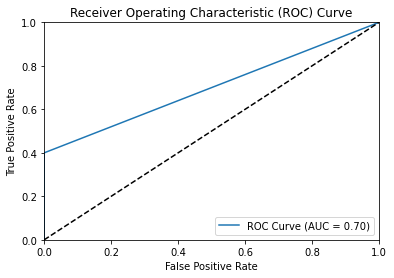

In [15]:
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
auc = roc_auc_score(Y_test, Y_pred)
plt.plot(fpr, tpr, label='ROC Curve (AUC = %0.2f)' % auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

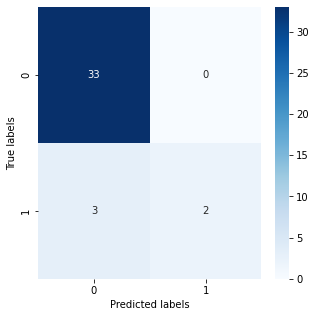

In [16]:
from sklearn.metrics import confusion_matrix
import itertools

Y_pred = lda_model.predict(X_test)


cnf_matrix = confusion_matrix(Y_test, Y_pred)

plt.figure(figsize=(5,5))
sn.heatmap(cnf_matrix, annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

In [17]:
#alternatively
predictions = pd.DataFrame(lda_model.predict_proba(X_test), columns = ['Does Not Have CHD', 'Has CHD'])
predictions

,Does Not Have CHD,Has CHD
0,0.870824,0.129176
1,0.933056,0.066944
2,0.382805,0.617195
3,0.967067,0.032933
4,0.967974,0.032026
5,0.978856,0.021144
6,0.914521,0.085479
7,0.925055,0.074945
8,0.784974,0.215026
9,0.818203,0.181797


In [18]:
X_test

,Sex_male,age,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
3631,0,47,0,0.0,0.0,0,1,0,190.0,162.0,85.0,30.59,65.0,80.0,0
2176,0,54,0,0.0,0.0,0,0,0,205.0,107.5,67.5,20.26,75.0,88.0,0
1931,0,58,0,0.0,0.0,0,1,1,240.0,150.0,80.0,26.45,66.0,255.0,1
2494,0,39,0,0.0,0.0,0,0,0,227.0,138.0,89.0,26.74,95.0,60.0,0
118,1,36,0,0.0,0.0,0,0,0,210.0,112.0,85.5,21.93,71.0,77.0,0
286,0,38,0,0.0,0.0,0,0,0,186.0,105.0,57.0,21.10,85.0,68.0,0
592,1,39,1,15.0,0.0,0,0,0,232.0,115.0,72.5,30.22,90.0,105.0,1
510,0,53,0,0.0,0.0,0,0,0,235.0,132.0,84.0,30.10,80.0,63.0,0
409,1,44,1,10.0,0.0,0,1,0,229.0,177.5,120.0,39.88,104.0,78.0,0
1430,1,51,1,20.0,0.0,0,1,0,260.0,123.0,72.0,26.83,65.0,65.0,1


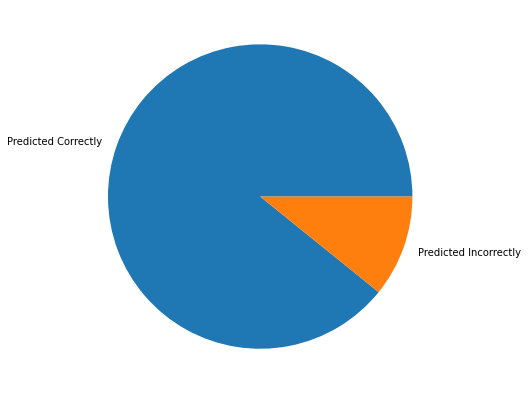

In [19]:
from matplotlib import pyplot as plt
import numpy as np

values = ['Predicted Correctly', 'Predicted Incorrectly']
 
data = [33, 4]

fig = plt.figure(figsize =(10, 7))
plt.pie(data, labels = values)
plt.show()